### Import the necessary libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

### Reading and storing the traing dataset

In [314]:
train = pd.read_csv("CS98XClassificationTrain.csv")

### Dropping unecessary columns

In [315]:
train = train.drop(['Id','title','artist'],axis=1)

#### Id is useless cause is different for every row and serves solely as a row identificator. Furthermore, the columns title and
#### artist are also not helpful because there are too many different classes of artists and song titles in the dataset.

### Checking for null values

In [ ]:
train.isna().sum().sort_values(ascending=False)

#### There are 15 null values on the dataset. For this analysis they will be removed.

In [316]:
train=train.dropna()

#### We will also reset the index to know exactly how many row consist the dataset.

In [317]:
train = train.reset_index()
train = train.drop(["index"], axis = 1)

#### We will identify what kind of values we have in our dataset

In [ ]:
train.info()

#### It is easy to see that every column contains integer values, with the exception of the "top genre" column which is consisted
#### of categorical variables. Finally, the remaining rows, without Null values, are 438.

#### ========================================================================================================

#### Now, we will use the describe() function to gain a deeper understanding of each numerical column of the dataset

In [ ]:
train.describe()

#### After describing the data, it is obvious that some variables such as dB, live, dur, acous and spch do noth follow a normal
#### distribution and are skewed and may create bias if applied to a model. As a result we will scale the necessary columns to 
#### avoid such potential issues. To gain a better understanding about the skewed variables we will use visuals.

#### In this analysis the objective is to make a model which will be able to classify songs to thei respective genre. So, the
#### next bar-graph reveals how many different genres exist within the dataset

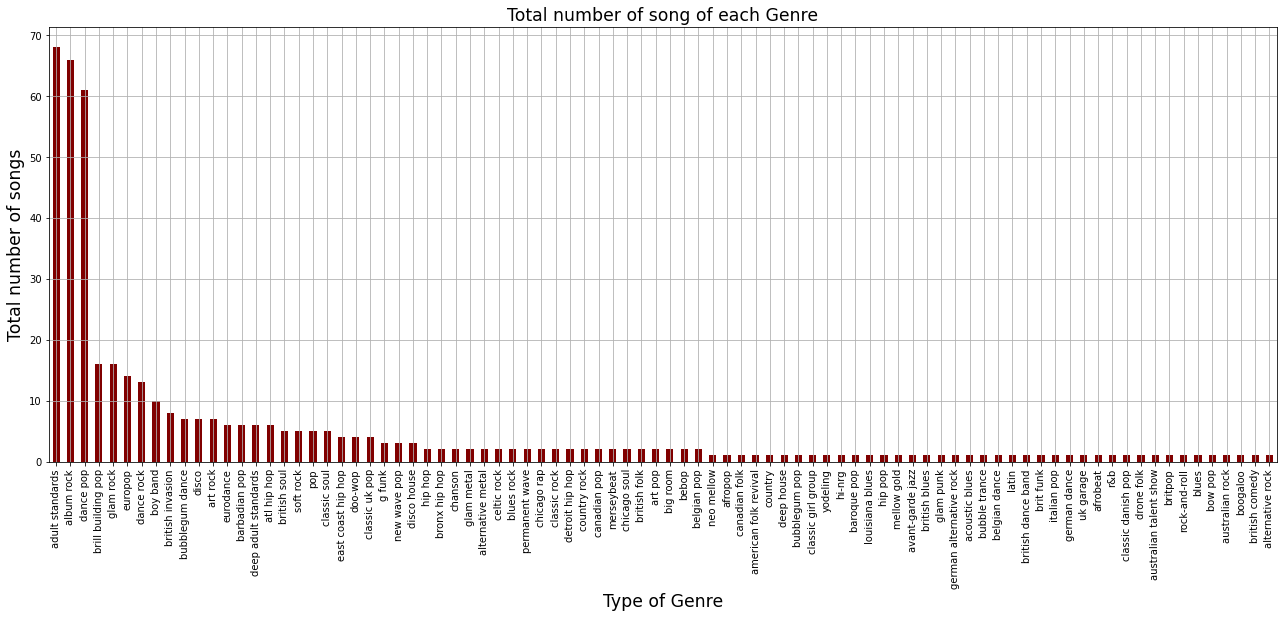

In [11]:
train["top genre"].value_counts().plot.bar(color="maroon",grid=True, figsize=(22,8))
plt.xlabel("Type of Genre",fontsize = "xx-large")
plt.ylabel("Total number of songs",fontsize = "xx-large")
plt.title("Total number of song of each Genre",fontsize = "xx-large")
plt.show()

In [29]:
train["top genre"].value_counts()

adult standards       68
album rock            66
dance pop             61
brill building pop    16
glam rock             16
                      ..
bow pop                1
australian rock        1
boogaloo               1
british comedy         1
alternative rock       1
Name: top genre, Length: 86, dtype: int64

#### We see that there are 86 different genres which are too many to build an accurate classification model. An aditional issue is
#### that not every genre is consisted with the same number of songs. For example there are several genres which consisted of only
#### one or two songs. As a result, it will be difficult for any model to train data and classify them to these genres.

### The following subplots will provide a better idea of each column's distribution

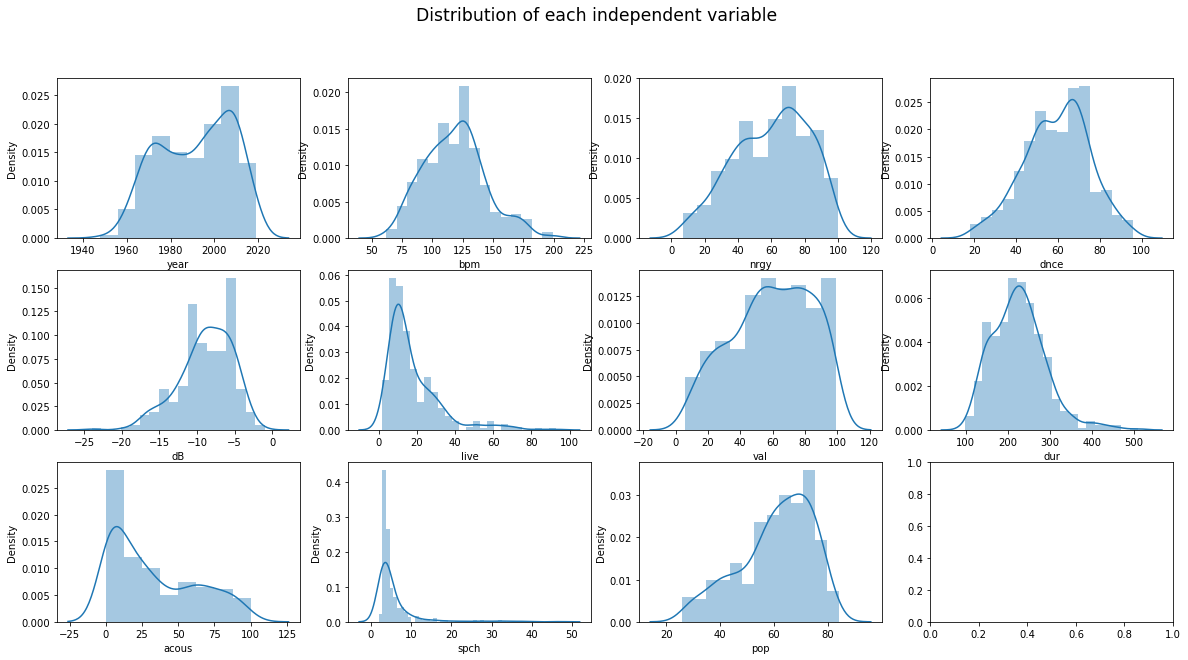

In [30]:
fig,ax = plt.subplots(3,4,figsize=(20,10))

sns.distplot(train['year'],ax=ax[0,0])
sns.distplot(train['bpm'],ax=ax[0,1])
sns.distplot(train['nrgy'],ax=ax[0,2])
sns.distplot(train['dnce'],ax=ax[0,3])
#sns.distplot(df['duration_min'],ax=ax[1,1])
sns.distplot(train['dB'],ax=ax[1,0])
sns.distplot(train['live'],ax=ax[1,1])
sns.distplot(train['val'],ax=ax[1,2])
sns.distplot(train['dur'],ax=ax[1,3])
sns.distplot(train['acous'],ax=ax[2,0])
sns.distplot(train['spch'],ax=ax[2,1])
sns.distplot(train['pop'],ax=ax[2,2])

plt.suptitle("Distribution of each independent variable",fontsize = "xx-large")
plt.show()

#### Like said above, variables such as dB, live, dur, acous and spch do noth follow a normal distribution and are skewed.

#### Another useful thing is to check the variables for potential multicollinearity between them. If multicollinearity exists 
#### between two variables, it is better to remove one of them. Otherwise the performance of the classification model will drop.
#### Another way to deal with multicollinearity is to use PCA (Principal Component Analysis) which takes advantage of multicollinearity
#### and combines the highly correlated variables into a set of uncorrelated variables.

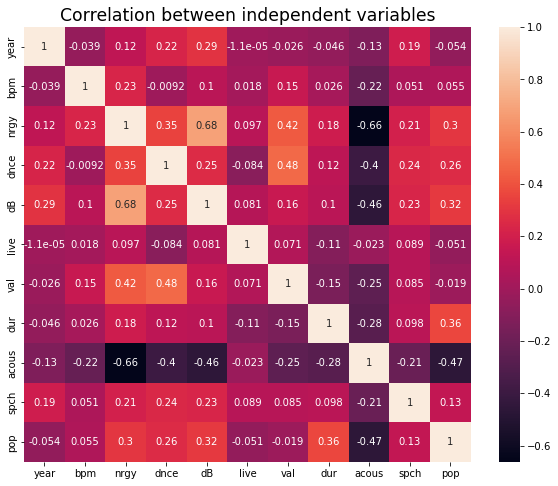

In [31]:
plt.figure(figsize=(10,8)) 
sns.heatmap(train.corr(), annot=True)
plt.title("Correlation between independent variables", fontsize = "xx-large")
plt.show()

#### From the heatmap, it is clear that there are no signs of multicollinearity beween the variables.

### Data Scaling

In [278]:
scaler = StandardScaler()
train[["acous", "spch", "live"]] = scaler.fit_transform(train[["acous", "spch", "live"]])

#### Only the most skewed data was scaled.

### Model Building

In [318]:
Y = train.loc[:, 'top genre']
X = train.drop(['top genre'], axis=1)

In [319]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=15)

#### Firstly we separated the data to values and labels. The values are consisted of the columns year, bpm, nrgy, dnce, dB, live
#### val, dur, acous, spch, pop and the labels which is the "top genre" column. Lastly, data are splitted to training-test sets.

### Firstly, we will try several classifiers to compare accuracy.

In [464]:
tree_clf = DecisionTreeClassifier()
log_clf = LogisticRegression()
ovr_clf = OneVsRestClassifier(LogisticRegression())
ovr2_clf = OneVsRestClassifier(SVC())
rnd_clf = RandomForestClassifier()
kn_clf = KNeighborsClassifier()
svm_clf = SVC(kernel='poly', degree=2, C=1)
mlp_clf = MLPClassifier()

#### Every model is fitted to the training data.

In [465]:
for clf in (log_clf, rnd_clf, svm_clf, kn_clf, mlp_clf, tree_clf, ovr_clf, ovr2_clf):
    clf.fit(X_train, Y_train)
    ypred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, ypred))

LogisticRegression 0.2727272727272727
RandomForestClassifier 0.32954545454545453
SVC 0.11363636363636363
KNeighborsClassifier 0.2727272727272727
MLPClassifier 0.14772727272727273
DecisionTreeClassifier 0.09090909090909091
OneVsRestClassifier 0.20454545454545456
OneVsRestClassifier 0.13636363636363635


#### The models do not produce good accuracies exept for the Random Forest model with 0.32954.. accuracy. To increase the model
#### performance we will use ensemble methods and hyperparameter tuning.

### Hyperparameter Tuning

#### For Hyperparameter tuning we will use both GridSearch and RandomSearch. While grid search looks at every possible 
#### combination of hyperparameters to find the best model, random search only selects and tests a random combination of 
#### hyperparameters. ( Our first hyperparameter tuning will be performed on a Naive Bayes model).

In [322]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=40, n_jobs=-1)
nbModel_grid.fit(X_train, Y_train)
print(nbModel_grid.best_estimator_)
nb_mod_clf = nbModel_grid.best_estimator_

Fitting 40 folds for each of 100 candidates, totalling 4000 fits
GaussianNB(var_smoothing=0.1873817422860384)


#### Our second tuning will be performed on a KNeigbours model.

In [323]:
metrics = ['euclidean','manhattan'] 
neighbors = np.arange(1, 16)
param_grid  = dict(metric=metrics, n_neighbors=neighbors)

In [324]:
cross_validation_fold = 40
grid_search = GridSearchCV(kn_clf, param_grid, cv=cross_validation_fold, scoring='accuracy', refit=True)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=40, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             scoring='accuracy')

In [325]:
KN_mod_clf = grid_search.best_estimator_

#### Our third tuning will be performed on a Random Forest model.

In [326]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [327]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(X_train, Y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='sqrt', max_leaf_nodes=6)


In [328]:
rf_mod_clf = RandomForestClassifier(max_depth=6,
                                    max_features="sqrt",
                                    max_leaf_nodes=6,
                                    n_estimators=50)

#### Compare accuracies between these 3 new models.

In [329]:
for clf in (nb_mod_clf, KN_mod_clf, rf_mod_clf):
    clf.fit(X_train, Y_train)
    ypred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, ypred))

GaussianNB 0.2840909090909091
KNeighborsClassifier 0.29545454545454547
RandomForestClassifier 0.32954545454545453


#### Random Forest still outperforms the other models.

### Enseble models

In [493]:
voting_clf = VotingClassifier(estimators=[('kn', kn_clf),('rf', rnd_clf),('lr', log_clf)], voting='soft')
voting2_clf = VotingClassifier(estimators=[('rf',rnd_clf),('nb',nb_mod_clf),('lr', log_clf)], voting='soft')
voting3_clf = VotingClassifier(estimators=[('sv',svm_clf),('kN',KN_mod_clf),('nB',nb_mod_clf),('lr', log_clf)], voting='hard')
voting4_clf = VotingClassifier(estimators=[('rfm', rf_mod_clf),('kN',KN_mod_clf),('smv',svm_clf)], voting='hard')

#### Compare accuracy for the models created using the ensemble method.

In [494]:
for clf in (voting_clf, voting2_clf, voting3_clf, voting4_clf):
    clf.fit(X_train, Y_train)
    ypred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, ypred))

VotingClassifier 0.32954545454545453
VotingClassifier 0.3068181818181818
VotingClassifier 0.2727272727272727
VotingClassifier 0.29545454545454547


#### The best performance comes from the last ensemble model whivh is consisted of a Random Forest, a Naive Bayes and a KNeighbour
#### model, after performing the hyperparameter tuning.

## Model Predictions

In [101]:
ypred = voting_clf.predict(X_test)
ypred

array(['album rock', 'dance pop', 'adult standards', 'brill building pop',
       'adult standards', 'adult standards', 'dance pop', 'dance pop',
       'avant-garde jazz', 'album rock', 'brill building pop',
       'album rock', 'adult standards', 'album rock', 'adult standards',
       'dance pop', 'album rock', 'album rock', 'eurodance',
       'adult standards', 'album rock', 'album rock', 'adult standards',
       'album rock', 'dance pop', 'adult standards', 'dance pop',
       'dance pop', 'album rock', 'brill building pop', 'adult standards',
       'dance pop', 'brill building pop', 'dance pop', 'adult standards',
       'dance pop', 'brill building pop', 'album rock', 'dance pop',
       'dance pop', 'adult standards', 'adult standards', 'dance pop',
       'adult standards', 'dance pop', 'adult standards', 'dance pop',
       'album rock', 'eurodance', 'dance pop', 'brill building pop',
       'dance pop', 'dance pop', 'glam rock', 'dance pop', 'album rock',
       'adult st

## Testing the model on the test data

In [332]:
test = pd.read_csv("CS98XClassificationTest.csv")

In [333]:
Id_number = test.loc[:, 'Id']

In [334]:
test = test.drop(['Id','title','artist'],axis=1)

In [273]:
test[["acous", "spch", "live"]] = scaler.fit_transform(test[["acous", "spch", "live"]])

In [498]:
final_predictions = voting4_clf.predict(test)

#### Importing the predicted values to a ".csv" file.

In [118]:
CSV = pd.DataFrame({
    "Id": Id_number,
    "top genre": KN_mod_clf.predict(test)
})
CSV.to_csv("classification12.csv", index=False)

In [109]:
########################## CHECKING ACCURACY ###############################

In [106]:
test2 = pd.read_csv('CS98XRegressionTest.csv')

In [107]:
test2=test2.dropna()
validation_test = test2["top genre"]

In [499]:
n = 0
for i in range(0,113,1):
    if list(final_predictions)[i] == list(validation_test)[i]:
        n = n + 1

print(n)

35


In [500]:
accuracy_score(validation_test, final_predictions)

0.30973451327433627